# SNSim Examples

### Example to show how generate 1 light curve for SNIa and SNCC 

In [1]:
import snsim
import numpy as np
import pandas as pd
from snsim.constants import C_LIGHT_KMS

### Init Survey Obj from observation file 

In [2]:
# Set the survey
survey_config = {'survey_file': './survey_file_example.csv', #survey observation log
                 'sig_psf': 0.0,
                 'sig_zp': 0.0,
                 'gain': 1.,
                 'zp': 25.,
                 'ra_size': 7.295,
                 'dec_size': 7.465,
                 'noise_key': ['skynoise', 'skysigADU']}

#init survey OBJ
survey = snsim.survey_host.SurveyObs(survey_config)
print(survey)

SURVEY FILE : ./survey_file_example.csv

First day in survey_file : 58000.00 MJD / 2017-09-04 00:00:00.000
Last day in survey_file : 58100.00 MJD / 2017-12-13 00:00:00.000

Survey effective duration is 100.00 days

Survey envelope area is 57.74 squared degrees (0.1 % of the sky)

No cut on survey file.


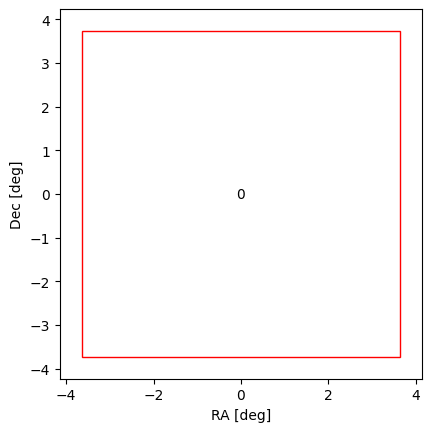

In [3]:
# Show the field map (Here one quadrant labeled 0)
survey.show_map()



## SNIa simulation

### Set the cosmology

In [4]:

# Set the cosmology (astropy.cosmology object)
cosmology = {'name': 'planck18'}
cosmo =  snsim.utils.set_cosmo(cosmology)

### Init SN parameters

In [5]:
# Set the SNIa parameters
zcos = 0.05
coords = np.radians([42, 42])

#parameters of SNIa object
sn_par = {'relation': 'SALTTripp',
          'zcos': zcos,
          'zpcmb': 0.0,
          'como_dist': cosmo.comoving_distance(zcos).value,
          'vpec': 300,
          't0': 58057,
          'ra': coords[0],
          'dec': coords[1],
          'mag_sct': 0.0,
          'x1':1, 
          'c':0.1,
          'M0': -19.3,
          'alpha': 0.14,
          'beta': 3.1,
          'mod_fcov': False          
         }


# Set the sncosmo source for SNIa
sn_source = snsim.utils.init_sn_source('salt2')

#Init SNIa object
SNIa = snsim.astrobj.SNIa(sn_source, sn_par)


In [6]:
#create a disctionary with parameter needed to define the observations of the SN
#evaluate Z-obs and time range where we can observed the event in the rest frame
#( [-20,50] phase respect to t_peak where Salt model is defined)
dict_obs_par={}
_1_zobs_ = (1 +sn_par['zcos']) * (1+sn_par['zpcmb'])*(1 + sn_par['vpec'] / C_LIGHT_KMS)    
dict_obs_par['min_t'] = sn_par['t0'] -20 * _1_zobs_
dict_obs_par['max_t'] = sn_par['t0'] + 50 * _1_zobs_
dict_obs_par['1_zobs'] = _1_zobs_
dict_obs_par['t0']=sn_par['t0']
dict_obs_par['ra']=sn_par['ra']
dict_obs_par['dec']=sn_par['dec']

#convert it to a DataFrame
obs_par=pd.DataFrame(dict_obs_par,index=[0])
obs_par

,min_t,max_t,1_zobs,t0,ra,dec
0,58035.978985,58109.552536,1.051051,58057,0.733038,0.733038


### Define the observation and simulate the light curve

In [7]:
#define the observation of the object
epochs,param= survey.get_observations(obs_par,[-30,60])
epochs

,time,band,fieldID,skynoise,zp,sig_zp,sig_psf,gain,zpsys
ID,,,,,,,,,
0,58026.530612,ztfg,1,405.460001,25.0,0.0,0.0,1.0,ab
0,58028.571429,ztfg,1,582.286411,25.0,0.0,0.0,1.0,ab
0,58030.612245,ztfg,1,862.602785,25.0,0.0,0.0,1.0,ab
0,58032.653061,ztfr,1,167.057133,25.0,0.0,0.0,1.0,ab
0,58034.693878,ztfg,1,637.828536,25.0,0.0,0.0,1.0,ab
0,58036.734694,ztfg,1,347.366061,25.0,0.0,0.0,1.0,ab
0,58038.775510,ztfr,1,476.512540,25.0,0.0,0.0,1.0,ab
0,58040.816327,ztfr,1,822.295606,25.0,0.0,0.0,1.0,ab
0,58042.857143,ztfr,1,746.557497,25.0,0.0,0.0,1.0,ab


In [8]:
#simulate the LC
lc=SNIa.gen_flux(epochs,np.random.default_rng(1200))
lc

,time,fluxtrue,fluxerrtrue,flux,fluxerr,mag,magerr,zp,zpsys,gain,skynoise,band,fieldID,sig_zp,sig_psf
epochs,,,,,,,,,,,,,,,
0,58036.734694,2.716761,347.369972,-384.401788,347.918931,NaN,NaN,25.0,ab,1.0,347.366061,ztfg,1,0.0,0.0
1,58038.775510,32.794970,476.546950,-301.690257,476.828996,NaN,NaN,25.0,ab,1.0,476.512540,ztfr,1,0.0,0.0
2,58040.816327,113.427351,822.364573,-257.713592,822.452295,NaN,NaN,25.0,ab,1.0,822.295606,ztfr,1,0.0,0.0
3,58042.857143,263.157757,746.733724,276.962281,746.742967,18.893948,2.927351,25.0,ab,1.0,746.557497,ztfr,1,0.0,0.0
4,58044.897959,444.700290,415.479995,706.573402,415.795021,17.877107,0.638920,25.0,ab,1.0,414.944486,ztfr,1,0.0,0.0
5,58046.938776,628.311541,290.815927,608.984918,290.782697,18.038484,0.518425,25.0,ab,1.0,289.733657,ztfr,1,0.0,0.0
6,58048.979592,819.901308,597.840241,1153.288501,598.119003,17.345155,0.563085,25.0,ab,1.0,597.154128,ztfr,1,0.0,0.0
7,58051.020408,978.317710,848.870707,2098.615177,849.530326,16.695168,0.439512,25.0,ab,1.0,848.294265,ztfr,1,0.0,0.0
8,58053.061224,1078.584800,995.045858,-790.937158,994.901308,NaN,NaN,25.0,ab,1.0,994.503733,ztfr,1,0.0,0.0


In [9]:
#parameters of the object in Lc header
lc.attrs

{'mu': 36.81185565719685,
 'zobs': 0.05105072689987433,
 'zCMB': 0.05105072689987433,
 'relation': 'SALTTripp',
 'zcos': 0.05,
 'zpcmb': 0.0,
 'como_dist': 218.93393187129323,
 'vpec': 300,
 't0': 58057,
 'ra': 0.7330382858376184,
 'dec': 0.7330382858376184,
 'mag_sct': 0.0,
 'x1': 1,
 'c': 0.1,
 'M0': -19.3,
 'alpha': 0.14,
 'beta': 3.1,
 'mod_fcov': False,
 'ID': 0,
 'mb': 17.341855657196852,
 'x0': 0.0018345787487376716}

### Plot the SN

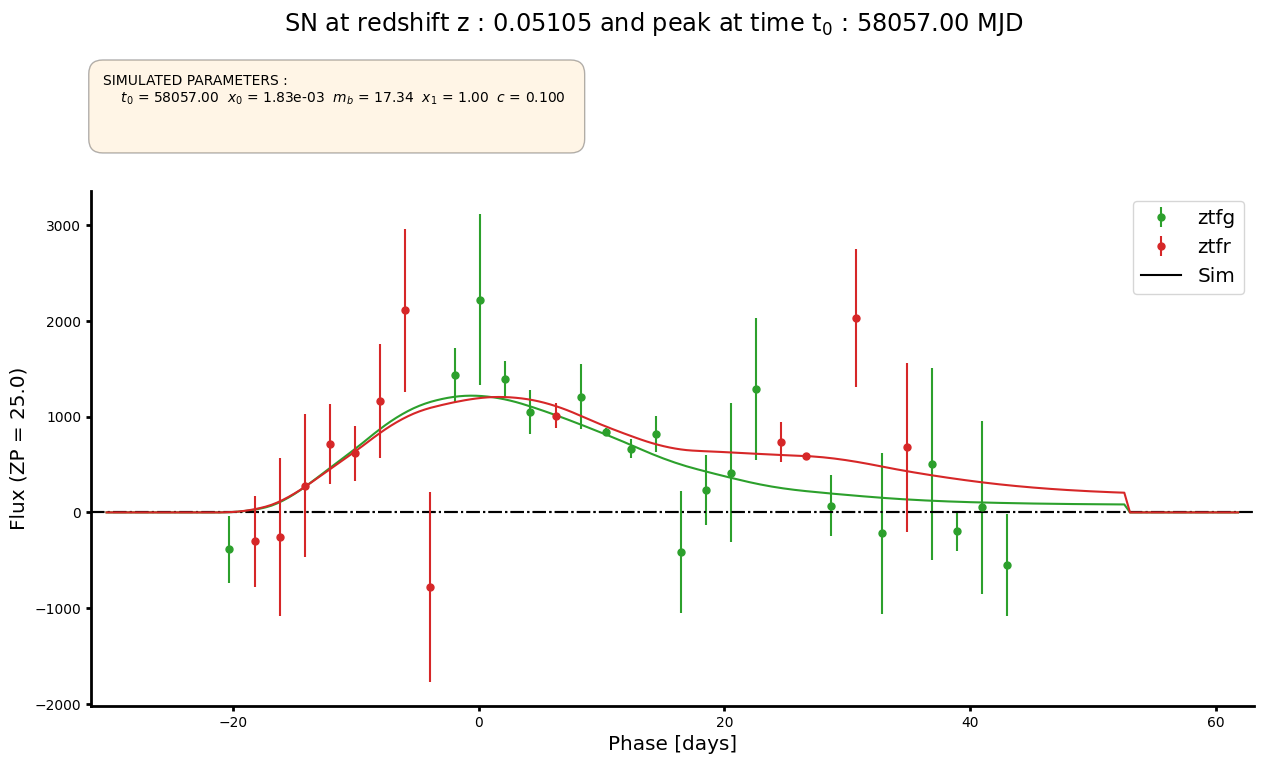

In [14]:
bandcol = {'ztfg': 'C2', 'ztfr': 'C3', 'ztfi': 'C5'}
snsim.plot_utils.plot_lc(lc,lc.attrs, snc_sim_model=SNIa.sim_model,
                        bandcol=bandcol,phase_limit=[-30,60])

### Add intrinsic scattering

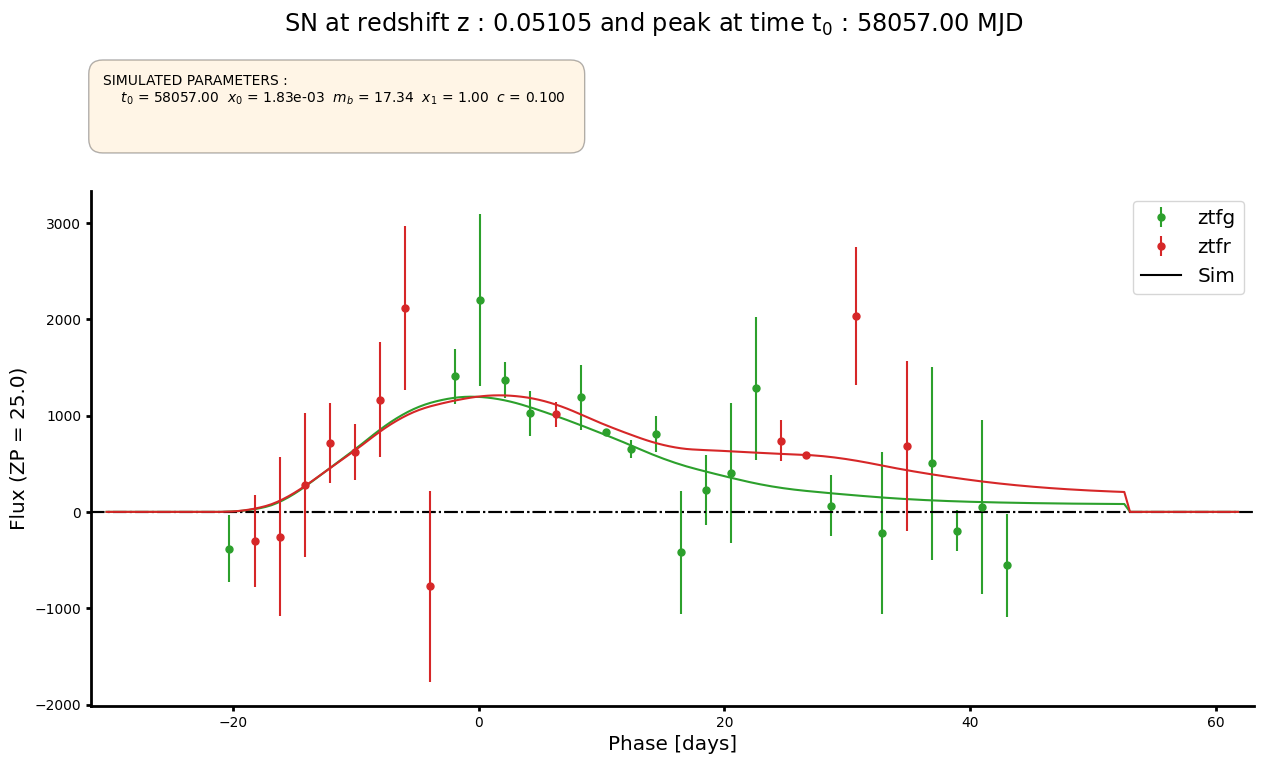

In [15]:
# Set the SNIa parameters
zcos = 0.05
coords = np.radians([42, 42])

# Set the sncosmo source for SNIa
sn_source = snsim.utils.init_sn_source('salt2')

effects = [snsim.scatter.init_sn_sct_model('G10', sn_source)]

#parameters of SNIa object
sn_par = {'relation': 'SALTTripp',
          'zcos': zcos,
          'zpcmb': 0.0,
          'como_dist': cosmo.comoving_distance(zcos).value,
          'vpec': 300,
          't0': 58057,
          'ra': coords[0],
          'dec': coords[1],
          'mag_sct': 0.0,
          'x1':1, 
          'c':0.1,
          'M0': -19.3,
          'alpha': 0.14,
          'beta': 3.1,
          'mod_fcov': False,
         }




#Init SNIa object
SNIa = snsim.astrobj.SNIa(sn_source, sn_par, effects=effects)

lc=SNIa.gen_flux(epochs,np.random.default_rng(1200))

bandcol = {'ztfg': 'C2', 'ztfr': 'C3', 'ztfi': 'C5'}
snsim.plot_utils.plot_lc(lc, lc.attrs, snc_sim_model=SNIa.sim_model,
                        bandcol=bandcol,phase_limit=[-30,60])

# Now we simulate 1 SN Core-Collapse

#### we use same observation file and cosmology as before

### We simulate a SNIc, but the method is the same for all SNCC

In [ ]:
# Set the SNIc parameters
zcos = 0.02
coords = np.radians([42, 42])

#parameters of SNIc object
sn_par = {'zcos': zcos,
          't0': 0.,
          'zpcmb': 0.0,
          'como_dist': cosmo.comoving_distance(zcos).value,
          'vpec': 500,
          't0': 58057, #simulated peak time of the event
          'ra': coords[0],
          'dec': coords[1],
          'mag_sct': 0.3,
          'M0': -18,
          'mod_fcov': False
           }

# Set the sncosmo model for SNIc
sn_source = snsim.utils.init_sn_source('v19-2007gr') #name of sncosmo built-in source


#Init SNIc object
SNIc = snsim.astrobj.SNIc(sn_source, sn_par)

In [ ]:
%%time
sn_source = snsim.utils.init_sn_source('v19-2007gr') #name of sncosmo built-in source


In [ ]:
#create a disctionary with parameter needed to define the observations of the SN
#evaluate Z-obs and time range where we can observed the event in the rest frame
#( [-20,50] phase respect to t_peak where Salt model is defined)
dict_obs_par={}
_1_zobs_ = 1 + SNIc.zobs    
dict_obs_par['min_t'] = SNIc.sim_model.mintime()
dict_obs_par['max_t'] = SNIc.sim_model.maxtime()
dict_obs_par['1_zobs'] = _1_zobs_
dict_obs_par['t0']=sn_par['t0']
dict_obs_par['ra']=sn_par['ra']
dict_obs_par['dec']=sn_par['dec']

#convert it to a DataFrame
obs_par=pd.DataFrame(dict_obs_par,index=[0])
obs_par

In [ ]:
#define the observation of the object
epochs,param= survey.get_observations(obs_par,[-200,250])
epochs

In [ ]:
#simulate the LC
lc=SNIc.gen_flux(epochs,np.random.default_rng(1200))
lc

In [ ]:
lc.attrs

In [ ]:
bandcol = {'ztfg': 'g', 'ztfr': 'r', 'ztfi': 'gold'}
snsim.plot_utils.plot_lc(lc,lc.attrs, snc_sim_model=SNIc.sim_model,
                        bandcol=bandcol,phase_limit=[-30,70])